# Collecting the data, creating and analysing the graph (network) representations

In [1]:
import pandas as pd
import pandas_datareader as pdr 
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns
import networkx as nx
import datetime
from scipy.stats import pearsonr
from trading_functions import *

# Data collection

In [23]:
def get_data(tickers, start_date, end_date):
    """
    Downloads and processes stock data for a given list of tickers within a specified date range.

    This function fetches the Adjusted Close prices and calculates the daily returns for each ticker
    provided. It ensures that the data covers the exact date range requested and combines the results into two
    dataframes: one for prices and one for daily returns, with missing values cleaned.

    Parameters:
    tickers (list): A list of stock ticker symbols.
    start_date (str): The start date for the data retrieval, in YYYY-MM-DD format.
    end_date (str): The end date for the data retrieval, in YYYY-MM-DD format.

    Returns:
    tuple: Contains two pandas DataFrames. The first DataFrame contains the Adjusted Close prices for each ticker,
    and the second contains the daily returns. If no data is available, empty lists are returned.
    """
    # Initialize variables to hold the number of tickers, and lists for price and daily returns dataframes
    number_of_tickers = len(tickers)
    price_list_df = []
    daily_returns_list_df = []
    
    # Convert start and end dates from strings to pandas Timestamps for comparison
    
    start_date_datetime = pd.Timestamp(start_date)
    end_date_datetime = pd.Timestamp(end_date)
    
    # Iterate over each ticker in the list
    for index, ticker in enumerate(tickers):
        print(index, len(tickers))  # Debug print: current index and total tickers
        sp = yf.download(ticker, start=start_date, end=end_date)  # Download stock data
        
        # Check if the download returned data
        if len(sp) > 0:
            sp_mod = sp[["Adj Close"]].copy()  # Copy the Adjusted Close prices
            # Calculate daily returns and add as a new column
            sp_mod.loc[:, "Daily Return"] = sp_mod["Adj Close"] / sp_mod["Adj Close"].shift(1) - 1
            sp_mod[ticker] = sp_mod['Adj Close']  # Duplicate 'Adj Close' column for easier access
            
            # Determine the first and last date of the downloaded data
            min_date = sp_mod[ticker].index[0]
            max_date = sp_mod[ticker].index[-1]
            print(min_date, start_date_datetime)  # Debug print: first date of data vs. requested start
            print(max_date, end_date_datetime)  # Debug print: last date of data vs. requested end
            
            # Check if the data covers the desired date range exactly
            if (min_date == start_date_datetime + datetime.timedelta(days=1)) and (max_date == end_date_datetime - datetime.timedelta(days=1)):
                price_list_df.append(sp_mod[[ticker]].copy())  # Add price data to list
                sp_mod[ticker] = sp_mod['Daily Return']  # Replace price data with daily returns
                daily_returns_list_df.append(sp_mod[ticker])  # Add daily returns data to list
    
    # Check if we have collected any data
    if len(price_list_df) > 0:
        # Concatenate all price dataframes and drop missing values
        price_df = pd.concat(price_list_df, axis=1).dropna()
        # Concatenate all daily returns dataframes and drop missing values
        daily_returns_df = pd.concat(daily_returns_list_df, axis=1).dropna()
    else:
        price_df = []
        daily_returns_df = []
    
    return price_df, daily_returns_df


In [24]:
format_string = "%Y-%m-%d"
training_start_date = "2010-01-03"
training_end_date = "2021-01-01"
testing_start_date = '2021-01-03'
testing_end_date = '2023-04-01'

ticker_df = pd.read_csv('nasdaq_screener_1686671592339.csv')
tickers = list(ticker_df['Symbol'].values)
tickers = tickers[0:500]
price_df_train, daily_returns_df_train = get_data(tickers,training_start_date,training_end_date)

0 500
[*********************100%***********************]  1 of 1 completed
2010-01-04 00:00:00 2010-01-03 00:00:00
2020-12-31 00:00:00 2021-01-01 00:00:00
1 500
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- AACI: Data doesn't exist for startDate = 1262494800, endDate = 1609477200
2 500
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- AACIW: Period 'max' is invalid, must be one of ['1d', '5d']
3 500
[*********************100%***********************]  1 of 1 completed
2018-02-16 00:00:00 2010-01-03 00:00:00
2020-12-31 00:00:00 2021-01-01 00:00:00
4 500
[*********************100%***********************]  1 of 1 completed
2010-01-04 00:00:00 2010-01-03 00:00:00
2020-12-31 00:00:00 2021-01-01 00:00:00
5 500
[*********************100%***********************]  1 of 1 completed
2010-01-04 00:00:00 2010-01-03 00:00:00
2020-12-31 00:00:00 2021-01-01 00:00:00
6 500
[*********************100%********************

[*********************100%***********************]  1 of 1 completed

1 Failed download:
- ACONW: Period 'max' is invalid, must be one of ['1d', '5d']
53 500
[*********************100%***********************]  1 of 1 completed
2010-01-04 00:00:00 2010-01-03 00:00:00
2020-12-31 00:00:00 2021-01-01 00:00:00
54 500
[*********************100%***********************]  1 of 1 completed
2015-10-06 00:00:00 2010-01-03 00:00:00
2020-12-31 00:00:00 2021-01-01 00:00:00
55 500
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- ACRV: Data doesn't exist for startDate = 1262494800, endDate = 1609477200
56 500
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- ACRX: No data found, symbol may be delisted
57 500
[*********************100%***********************]  1 of 1 completed
2012-02-07 00:00:00 2010-01-03 00:00:00
2020-12-31 00:00:00 2021-01-01 00:00:00
58 500
[*********************100%***********************]  1 of 1 c

[*********************100%***********************]  1 of 1 completed
2010-01-04 00:00:00 2010-01-03 00:00:00
2020-12-31 00:00:00 2021-01-01 00:00:00
105 500
[*********************100%***********************]  1 of 1 completed
2013-04-26 00:00:00 2010-01-03 00:00:00
2020-12-31 00:00:00 2021-01-01 00:00:00
106 500
[*********************100%***********************]  1 of 1 completed
2010-01-04 00:00:00 2010-01-03 00:00:00
2020-12-31 00:00:00 2021-01-01 00:00:00
107 500
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- AFARU: Data doesn't exist for startDate = 1262494800, endDate = 1609477200
108 500
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- AFARW: Period 'max' is invalid, must be one of ['1d', '5d']
109 500
[*********************100%***********************]  1 of 1 completed
2017-04-28 00:00:00 2010-01-03 00:00:00
2020-12-31 00:00:00 2021-01-01 00:00:00
110 500
[*********************100%*************

[*********************100%***********************]  1 of 1 completed

1 Failed download:
- ALTUW: Data doesn't exist for startDate = 1262494800, endDate = 1609477200
208 500
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- ALVO: Data doesn't exist for startDate = 1262494800, endDate = 1609477200
209 500
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- ALVOW: Period 'max' is invalid, must be one of ['1d', '5d']
210 500
[*********************100%***********************]  1 of 1 completed
2020-07-30 00:00:00 2010-01-03 00:00:00
2020-12-31 00:00:00 2021-01-01 00:00:00
211 500
[*********************100%***********************]  1 of 1 completed
2020-07-17 00:00:00 2010-01-03 00:00:00
2020-12-31 00:00:00 2021-01-01 00:00:00
212 500
[*********************100%***********************]  1 of 1 completed
2018-11-02 00:00:00 2010-01-03 00:00:00
2020-12-31 00:00:00 2021-01-01 00:00:00
213 500
[*********************1

[*********************100%***********************]  1 of 1 completed

1 Failed download:
- ANTX: Data doesn't exist for startDate = 1262494800, endDate = 1609477200
260 500
[*********************100%***********************]  1 of 1 completed
2013-08-12 00:00:00 2010-01-03 00:00:00
2020-12-31 00:00:00 2021-01-01 00:00:00
261 500
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- ANZU: No data found, symbol may be delisted
262 500
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- ANZUU: No data found, symbol may be delisted
263 500
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- ANZUW: No data found, symbol may be delisted
264 500
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- AOGO: Data doesn't exist for startDate = 1262494800, endDate = 1609477200
265 500
[*********************100%***********************]  1 of 1 complet

[*********************100%***********************]  1 of 1 completed
2010-01-04 00:00:00 2010-01-03 00:00:00
2020-12-31 00:00:00 2021-01-01 00:00:00
312 500
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- ARBB: Data doesn't exist for startDate = 1262494800, endDate = 1609477200
313 500
[*********************100%***********************]  1 of 1 completed
2020-10-30 00:00:00 2010-01-03 00:00:00
2020-12-31 00:00:00 2021-01-01 00:00:00
314 500
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- ARBEW: Period 'max' is invalid, must be one of ['1d', '5d']
315 500
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- ARBGW: No data found, symbol may be delisted
316 500
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- ARBK: Data doesn't exist for startDate = 1262494800, endDate = 1609477200
317 500
[*********************100%***********

[*********************100%***********************]  1 of 1 completed
2010-01-04 00:00:00 2010-01-03 00:00:00
2020-12-31 00:00:00 2021-01-01 00:00:00
414 500
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- ATVI: No data found, symbol may be delisted
415 500
[*********************100%***********************]  1 of 1 completed
2018-03-06 00:00:00 2010-01-03 00:00:00
2020-12-31 00:00:00 2021-01-01 00:00:00
416 500
[*********************100%***********************]  1 of 1 completed
2017-06-27 00:00:00 2010-01-03 00:00:00
2020-12-31 00:00:00 2021-01-01 00:00:00
417 500
[*********************100%***********************]  1 of 1 completed
2015-06-25 00:00:00 2010-01-03 00:00:00
2020-12-31 00:00:00 2021-01-01 00:00:00
418 500
[*********************100%***********************]  1 of 1 completed
2010-01-04 00:00:00 2010-01-03 00:00:00
2020-12-31 00:00:00 2021-01-01 00:00:00
419 500
[*********************100%***********************]  1 of 1 completed
201

In [4]:
price_df_train.head()

,AACG,AAL,AAME,AAON,AAPL,ABCB,ABEO,ABIO,ABUS,ABVC,...,AZPN,AZTA,BANF,BANFP,BANR,BBGI,BBSI,BCAL,BCBP,BCDA
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-04,0.377391,4.496877,1.193414,3.492817,6.470741,6.419696,4000.0,2479.679932,4.60,343949.03125,...,9.90,7.001814,13.661978,10.091043,13.484695,2.683620,9.686828,9.0,4.683233,91.800003
2010-01-05,0.373376,5.005959,1.265742,3.391475,6.481929,6.489953,4062.5,2449.439941,4.55,343949.03125,...,9.76,7.245425,13.230927,10.091043,13.239519,2.606946,9.648111,9.0,4.657359,91.800003
2010-01-06,0.362135,4.798553,1.265742,3.256933,6.378824,6.621684,3975.0,2449.439941,4.60,343949.03125,...,9.70,7.913384,13.311294,10.091043,13.141451,2.384588,9.679087,9.0,4.657359,91.800003
2010-01-07,0.362938,4.939964,1.193414,3.377497,6.367032,6.841237,4062.5,2487.239990,4.60,315286.62500,...,9.51,8.345594,13.406274,10.091043,13.876980,2.606946,10.577306,9.0,4.657359,91.800003
2010-01-08,0.381406,4.845691,1.256701,3.417684,6.409363,6.867583,4112.5,2494.800049,3.95,300955.40625,...,9.41,8.400604,13.424540,10.091043,14.661549,2.683620,10.708936,9.0,4.657359,91.800003


# 2 Network creation
I have to determine where to split the dataset and create a network for that period (time window), which ised to check for cross-correlations in that period.

# 2.1. Equal time splits
I approach the network creation with do equal split between different periods (time windows).

In [5]:
def split_time_windows(tot_days, n_time_windows, chosen_time_window_size, size_boolean):
    """
    Splits the total number of days into time windows either based on the number of windows or a specified window size.

    This function divides the total days into equal-sized time windows. If size_boolean is True, it instead uses a specified
    window size to determine the splits. The function rounds window boundaries to the nearest integer day and adjusts the
    window sizes accordingly.

    Parameters:
    tot_days (int): Total number of days to be split.
    n_time_windows (int): The desired number of time windows (ignored if size_boolean is True).
    chosen_time_window_size (int): The size of each time window if size_boolean is True.
    size_boolean (bool): Determines whether the time windows are based on a fixed number (False) or a specified size (True).

    Returns:
    tuple: A list of time window splits and the size of a single time window.
    """
    
    # Generate evenly spaced values over the specified interval
    time_window_splits_total = np.linspace(0, tot_days, n_time_windows)
    # Round the values to ensure they correspond to whole days
    time_window_splits = [int(x) for x in time_window_splits_total]
    # Calculate the size of the time window based on the first interval
    time_window_size = time_window_splits[1] - time_window_splits[0]
    
    # If size_boolean is True, calculate the time window splits based on the chosen time window size
    if size_boolean:
        # Generate a range of values with the specified step size
        time_window_splits_total = np.arange(0, tot_days, chosen_time_window_size)
        # Adjust the calculation to account for the specific window size, reversing the order
        time_window_splits = sorted([tot_days + 1 - int(x) for x in time_window_splits_total])
        # The size of the time window is set to the chosen window size
        time_window_size = chosen_time_window_size
        # Recalculate the actual size of the first window to ensure accuracy
        time_window_size = time_window_splits[1] - time_window_splits[0]
    
    return time_window_splits, time_window_size


In [6]:
# Define the number of time windows desired
n_time_windows = 100
# Set to True to indicate that the split should be based on a specific window size, rather than an equal division of days
size_boolean = True
# Specify the size of each time window when 'size_boolean' is True
chosen_time_window_size = 30
# Calculate the total number of days based on the length of the price dataframe for training
tot_days = len(price_df_train)
# Use the split_time_windows function to calculate the splits and size of the time windows based on the above parameters
time_window_splits, time_window_size = split_time_windows(tot_days, n_time_windows, chosen_time_window_size, size_boolean)

# Output the total number of days covered by the price dataframe
print('The total number of days is', tot_days)
# Output the total number of time windows generated
print('Total number of time windows is', len(time_window_splits))
# Output the number of days that each time window covers
print('The number of days for each time window is', time_window_size)


The total number of days is 2769
Total number of time windows is 93
The number of days for each time window is 30


In [7]:
def find_correlation_groups(time_window_splits, price_df, link_threshold, frequency_threshold, draw):
    """
    Identifies groups of assets with strong correlations within specified time windows.
    
    Parameters:
    - time_window_splits: Indices to split the price DataFrame into time windows.
    - price_df: DataFrame containing price data for different assets.
    - link_threshold: Correlation coefficient threshold for linking two assets.
    - frequency_threshold: Threshold for the frequency of a link appearing across time windows to be considered significant.
    - draw: Boolean flag indicating whether to draw the network graph.
    
    Returns:
    - List of sets, each set contains tickers of assets that are strongly correlated within the time windows.
    """

    # Calculate correlation matrices for each time window
    corr_df_dict = {}
    for i in range(1, len(time_window_splits)):
        # Compute correlation matrix for each time window and store it
        corr_df_dict[i] = price_df.iloc[time_window_splits[i-1]:time_window_splits[i], :].corr()

    # Prepare asset ticker list from the columns of the first correlation matrix
    asset_ticker_list = list(corr_df_dict[1].columns)
    
    # Initialize dictionary to hold correlation pairs for each time window
    correlation_pairs_dict = {}
    for time_window_index in corr_df_dict.keys():
        correlation_pairs_dict[time_window_index] = {}
        # Iterate over all possible asset pairs
        for ticker_1 in asset_ticker_list:
            for ticker_2 in asset_ticker_list:
                if ticker_1 != ticker_2:  # Avoid self-correlation
                    # Store the correlation coefficient between each pair
                    correlation_pairs_dict[time_window_index][(ticker_1, ticker_2)] = corr_df_dict[time_window_index].loc[ticker_1, ticker_2]

    # Identify strongly correlated pairs and build a network for each time window
    network_dict = {}
    for time_window_index in correlation_pairs_dict.keys():
        G = nx.Graph()  # Initialize a new graph for the time window
        for pair, correlation in correlation_pairs_dict[time_window_index].items():
            if correlation >= link_threshold:  # Check if the correlation exceeds the threshold
                G.add_edge(pair[0], pair[1])  # Add an edge for strongly correlated pairs
        network_dict[time_window_index] = G  # Store the graph

    # Count the frequency of each link across all time windows
    weighted_edgelist_dict = {}
    number_of_windows = len(network_dict.keys())
    for G in network_dict.values():
        for edge in G.edges:
            if edge in weighted_edgelist_dict:
                weighted_edgelist_dict[edge] += 1 / number_of_windows
            else:
                weighted_edgelist_dict[edge] = 1 / number_of_windows

    # Filter links by frequency threshold
    thresholded_edgelist_dict = {}
    for edge, freq in weighted_edgelist_dict.items():
        if freq >= frequency_threshold:
            thresholded_edgelist_dict[edge] = np.round(freq, 2)

    # Create a final graph with edges that meet the frequency threshold
    G_thresh = nx.Graph()
    for edge, weight in thresholded_edgelist_dict.items():
        G_thresh.add_edge(edge[0], edge[1], weight=weight)
    
    # Identify separate groups of connected components
    separate_groups = list(nx.connected_components(G_thresh))

    # Optionally draw the graph
    if draw:
        pos = nx.spring_layout(G_thresh)  # Position nodes using Spring layout
        plt.figure()
        nx.draw(G_thresh, pos, edge_color='black', node_size=1050, with_labels=True, node_color='black', font_color='white')
        nx.draw_networkx_edge_labels(G_thresh, pos, edge_labels=thresholded_edgelist_dict, font_color='red')

    # Filter and return groups larger than 1 asset
    separate_groups_list = [group for group in separate_groups if len(group) > 1]
    return separate_groups_list

Each link has a correlation threshold link_threshold= 0.6 , meaning that it needs to have at least this much of correlation to be considered at all.
Each link has to appear in at least  frequency_threshold 0.5  of all time windows.
This gives us robust groups, as it is shown in the drawing below:


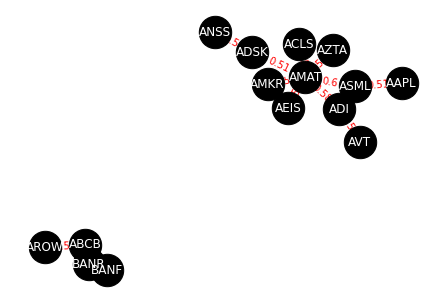

In [8]:
# As an example, set the parameters 
link_threshold = 0.6
frequency_threshold = 0.5
draw = True
separate_groups  = find_correlation_groups(time_window_splits,price_df_train,link_threshold,frequency_threshold ,draw)
print('Each link has a correlation threshold','link_threshold=',link_threshold,', meaning that it needs to have at least this much of correlation to be considered at all.')
print('Each link has to appear in at least ','frequency_threshold',frequency_threshold,' of all time windows.')
print("This gives us robust groups, as it is shown in the drawing below:")

# 2.2 Parameter analysis
In this section, I analyze the interplay between the link and frequency threshold.

In [9]:
# Set step size for threshold increments and draw flag for visualization
step = 0.1
draw = False

# Initialize dictionary to store results for different combinations of thresholds
link_frequency_dictionary = {'frequency_threshold': [], 'link_threshold': [], 'number_of_groups': [], 'mean_group_size': [], 'std_group_size': []}

# Loop through possible link_threshold values from 0 to 1 by step
for link_threshold in np.arange(0, 1 + step, step):
    # Loop through possible frequency_threshold values from 0 to 1 by step
    for frequency_threshold in np.arange(0, 1 + step, step):
        print(np.round(link_threshold,2),np.round(frequency_threshold,2))
        
        # Find separate groups based on current thresholds
        separate_groups = find_correlation_groups(time_window_splits, price_df_train, link_threshold, frequency_threshold, draw)
        # Calculate the number of groups found
        nr_groups = len(separate_groups)
        # Calculate sizes of each group as a fraction of total tickers
        group_sizes = [len(group) / len(tickers) for group in separate_groups]
        
        # Calculate mean and standard deviation of group sizes if any groups are found
        if len(group_sizes) > 0:
            mean_group_size = np.mean(group_sizes)
            std_group_size = np.std(group_sizes)
        else:  # Default to 0 if no groups are found
            mean_group_size = 0
            std_group_size = 0
        
        # Append results for current threshold combination to the dictionary
        link_frequency_dictionary['frequency_threshold'].append(np.round(frequency_threshold, 1))
        link_frequency_dictionary['link_threshold'].append(np.round(link_threshold, 1))
        link_frequency_dictionary['mean_group_size'].append(np.round(mean_group_size, 3))
        link_frequency_dictionary['std_group_size'].append(np.round(std_group_size, 3))
        link_frequency_dictionary['number_of_groups'].append(nr_groups)


0.0 0.0
0.0 0.1
0.0 0.2
0.0 0.3
0.0 0.4
0.0 0.5
0.0 0.6
0.0 0.7
0.0 0.8
0.0 0.9
0.0 1.0
0.1 0.0
0.1 0.1
0.1 0.2
0.1 0.3
0.1 0.4
0.1 0.5
0.1 0.6
0.1 0.7
0.1 0.8
0.1 0.9
0.1 1.0
0.2 0.0
0.2 0.1
0.2 0.2
0.2 0.3
0.2 0.4
0.2 0.5
0.2 0.6
0.2 0.7
0.2 0.8
0.2 0.9
0.2 1.0
0.3 0.0
0.3 0.1
0.3 0.2
0.3 0.3
0.3 0.4
0.3 0.5
0.3 0.6
0.3 0.7
0.3 0.8
0.3 0.9
0.3 1.0
0.4 0.0
0.4 0.1
0.4 0.2
0.4 0.3
0.4 0.4
0.4 0.5
0.4 0.6
0.4 0.7
0.4 0.8
0.4 0.9
0.4 1.0
0.5 0.0
0.5 0.1
0.5 0.2
0.5 0.3
0.5 0.4
0.5 0.5
0.5 0.6
0.5 0.7
0.5 0.8
0.5 0.9
0.5 1.0
0.6 0.0
0.6 0.1
0.6 0.2
0.6 0.3
0.6 0.4
0.6 0.5
0.6 0.6
0.6 0.7
0.6 0.8
0.6 0.9
0.6 1.0
0.7 0.0
0.7 0.1
0.7 0.2
0.7 0.3
0.7 0.4
0.7 0.5
0.7 0.6
0.7 0.7
0.7 0.8
0.7 0.9
0.7 1.0
0.8 0.0
0.8 0.1
0.8 0.2
0.8 0.3
0.8 0.4
0.8 0.5
0.8 0.6
0.8 0.7
0.8 0.8
0.8 0.9
0.8 1.0
0.9 0.0
0.9 0.1
0.9 0.2
0.9 0.3
0.9 0.4
0.9 0.5
0.9 0.6
0.9 0.7
0.9 0.8
0.9 0.9
0.9 1.0
1.0 0.0
1.0 0.1
1.0 0.2
1.0 0.3
1.0 0.4
1.0 0.5
1.0 0.6
1.0 0.7
1.0 0.8
1.0 0.9
1.0 1.0


In [16]:
link_frequency_df = pd.DataFrame(link_frequency_dictionary)
number_of_groups_df = link_frequency_df.pivot(index='frequency_threshold', columns='link_threshold', values='number_of_groups')
mean_group_size_df = link_frequency_df.pivot(index='frequency_threshold', columns='link_threshold', values='mean_group_size')
std_group_size_df = link_frequency_df.pivot(index='frequency_threshold', columns='link_threshold', values='std_group_size')

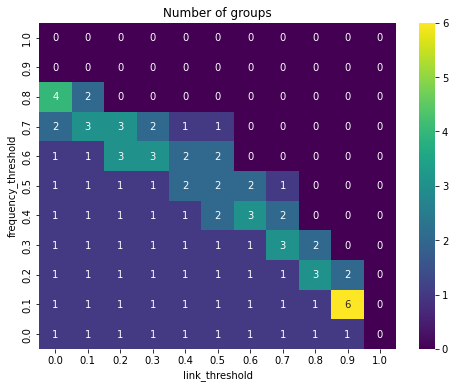

In [17]:
plt.figure(figsize = (8,6))
ax = sns.heatmap(number_of_groups_df, annot=True, fmt="g", cmap='viridis')
ax.invert_yaxis()
plt.title('Number of groups');

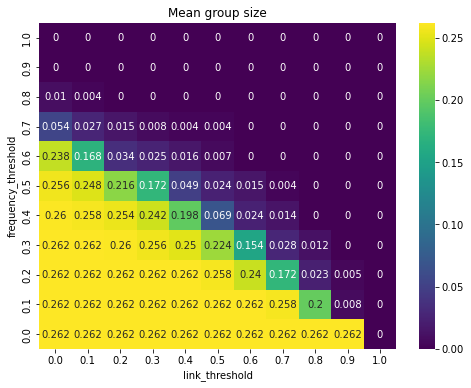

In [18]:
plt.figure(figsize = (8,6))
ax = sns.heatmap(mean_group_size_df, annot=True, fmt="g", cmap='viridis')
ax.invert_yaxis()
plt.title('Mean group size');

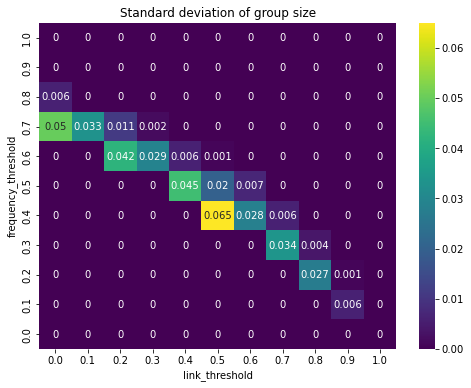

In [20]:
plt.figure(figsize = (8,6))
ax = sns.heatmap(std_group_size_df, annot=True, fmt="g", cmap='viridis')
ax.invert_yaxis()
plt.title('Standard deviation of group size');